In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

path = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/stabilitydataset/'
TTVpath = 'data/TTVsystems/KOI-0314/simulation_archives/runs/sa'
respath = 'data/resonant/simulation_archives/runs/sa'

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


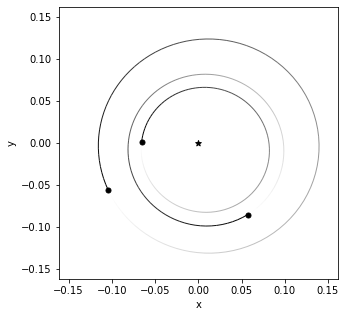

In [2]:
sa = rebound.SimulationArchive(path+TTVpath+'0000002.bin')
tmax = sa[1].t
sim = sa[0]

fig = rebound.OrbitPlot(sim)

In [3]:
ps = sim.particles
for i in [1,2]:
    print((ps[i+1].a-ps[i].a)/ps[i].a/((ps[i].m + ps[i+1].m)/ps[0].m)**(1/3.))

9.529650962789256
16.551262470389073


In [4]:
ps = sim.particles
Mstar = ps[0].m
P1 = ps[1].P

sim2 = rebound.Simulation()
sim2.G = 4*np.pi**2
sim2.add(m=1.)

for p in ps[1:]: 
    sim2.add(m=p.m/Mstar, P=p.P/P1, e=p.e, inc=p.inc, pomega=p.pomega, Omega=p.Omega, theta=p.theta)

sim2.move_to_com()

sim2.integrator="whfast"
sim2.dt=sim2.particles[1].P*2.*np.sqrt(3)/100.
sim2.ri_whfast.safe_mode = 0
sim2.ri_whfast.keep_unsynchronized = 1

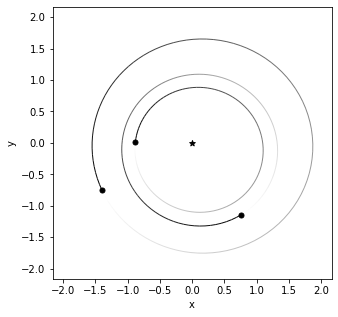

In [5]:
fig = rebound.OrbitPlot(sim2)

In [6]:
import sys
sys.path.append('../')
from training_data_functions import ressummaryfeaturesxgbv4, ressummaryfeaturesxgb, AMD_stability_coefficients, ressummaryfeaturesxgb2

In [7]:
import sys
sys.path.append('../')
from training_data_functions import ressummaryfeaturesxgbv5, getpairsv5, resparamsv5, restseriesv5, ressummaryfeaturesxgb, AMD_stability_coefficients, ressummaryfeaturesxgb2

In [8]:
getpairsv5(sim)

[['near', 1, 2], ['far', 2, 3], ['outer', 1, 3]]

In [9]:
resparamsv5(sim, (1e4, 1000))

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/celmech/celmech/andoyer.py:98: UserWarning: k=1 resonance has no separatrix for Phiprime < 1
  warnings.warn("k=1 resonance has no separatrix for Phiprime < 1")


betanear              9.529651
EMcrossnear           0.213241
jnear                 4.000000
knear                 1.000000
strengthnear          0.148295
C_AMDnear            16.755089
reshalfwidthnear           NaN
betafar              16.551262
EMcrossfar            0.410543
jfar                  5.000000
kfar                  2.000000
strengthfar           0.040486
C_AMDfar              0.716170
reshalfwidthfar       0.003028
betaouter            42.058769
EMcrossouter          0.711330
jouter               -1.000000
kouter               -1.000000
strengthouter        -1.000000
C_AMDouter            1.601450
reshalfwidthouter          NaN
secondres             0.273007
dtype: float64

In [10]:
val = restseriesv5(sim, (1e4, 1000))

# EM and Zcross vary. See research log

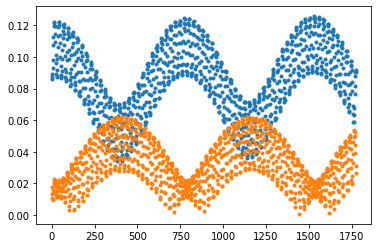

In [29]:
fig, ax = plt.subplots()
ax.plot(val[:,0], val[:,1], '.')
ax.plot(val[:,0], val[:,3], '.')

In [23]:
ps = sim.particles
i1 = 1
i2 = 2
np.sqrt((ps[i2].e*np.cos(ps[i2].pomega)-ps[i1].e*np.cos(ps[i1].pomega))**2 + (ps[i2].e*np.sin(ps[i2].pomega)-ps[i1].e*np.sin(ps[i1].pomega))**2)

0.01926934796481851

In [24]:
ps[i1].e

0.16041781573739228

In [25]:
ps[i2].e

0.14174032142751794

In [26]:
ps[i1].pomega

2.522556995600441

In [27]:
ps[i2].pomega

2.491127322967621

In [28]:
from celmech import Poincare, Andoyer
pvars = Poincare.from_Simulation(sim)
avars = Andoyer.from_Poincare(pvars, j=4, k=1, a10=ps[1].a, i1=i1, i2=i2)
avars.Z

0.004004316310206578

# EP vs Zcom, much closer

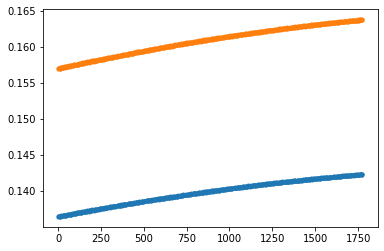

In [34]:
fig, ax = plt.subplots()
ax.plot(val[:,0], val[:,2], '.')
ax.plot(val[:,0], val[:,5], '.')

# MEGNO

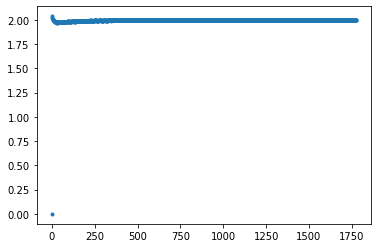

In [40]:
fig, ax = plt.subplots()
ax.plot(val[:,0], val[:,23], '.')
#ax.plot(val[:,0], val[:,5], '.')

In [8]:
f = ressummaryfeaturesxgbv5(sim, (10000, 1000))

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/celmech/celmech/andoyer.py:98: UserWarning: k=1 resonance has no separatrix for Phiprime < 1
  warnings.warn("k=1 resonance has no separatrix for Phiprime < 1")


In [9]:
for col in f.keys():
    print(col, f[col])

nearpair 12.0
betanear 9.529650962789256
EMcrossnear 0.21324132625510342
Zcrossnear 0.1507843878241966
jnear 4.0
knear 1.0
strengthnear 0.14829517556043784
C_AMDnear 16.755088943773924
reshalfwidthnear nan
betafar 16.551262470389073
EMcrossfar 0.41054347864710755
Zcrossfar 0.2902980777232843
jfar 5.0
kfar 2.0
strengthfar 0.04048566381178962
C_AMDfar 0.7161695893358182
reshalfwidthfar 0.0030278697477963343
betaouter 42.058768709072446
EMcrossouter 0.7113296407743039
Zcrossouter 0.5029860126505011
jouter -1.0
kouter -1.0
strengthouter -1.0
C_AMDouter 1.6014496621725522
reshalfwidthouter nan
maxj 4.0
maxk 1.0
maxi1 1.0
maxi2 2.0
maxstrength 0.14829517556043784
secondres 0.27300728873199015
unstableinNorbits 0.0
tlyap 10000.0
megno 1.985254367415039
EMmednear 0.08983984995882308
EMmaxnear 0.12257666756796912
EMstdnear 0.018284181088993545
EMslopenear 1.5197085590875707
EMrollingstdnear 0.031080137253573368
EPmednear 0.1371833440995745
EPmaxnear 0.1379266150755547
EPstdnear 0.00040183393857

In [7]:
nf = ressummaryfeaturesxgbv4(sim2, (10000, 1000))
f = ressummaryfeaturesxgbv4(sim, (10000, 1000))

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/celmech/celmech/andoyer.py:98: UserWarning: k=1 resonance has no separatrix for Phiprime < 1
  warnings.warn("k=1 resonance has no separatrix for Phiprime < 1")


near nan nan 0.002572506289812532
far 0.020168085800136425 0.0266733939514445 0.023645524203648145


../training_data_functions.py:832: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,c  = np.linalg.lstsq(np.vstack([times/P0, np.ones(len(times))]).T, EM)[0]
../training_data_functions.py:843: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,c  = np.linalg.lstsq(np.vstack([times/P0, np.ones(len(times))]).T, EP)[0]
../training_data_functions.py:863: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default a

near nan nan 0.0025725062898135187
far 0.020168085800133666 0.02667339395144175 0.023645524203645414


In [8]:
f

nearpair                1.200000e+01
betanear                9.529651e+00
EMcrossnear             2.132413e-01
Zcrossnear              1.507844e-01
jnear                   4.000000e+00
knear                   1.000000e+00
strengthnear            1.482952e-01
C_AMDnear               1.675509e+01
reshalfwidthnear                 NaN
betafar                 1.655126e+01
EMcrossfar              4.105435e-01
Zcrossfar               2.902981e-01
jfar                    5.000000e+00
kfar                    2.000000e+00
strengthfar             4.048566e-02
C_AMDfar                7.161696e-01
reshalfwidthfar         3.027870e-03
betaouter               4.205877e+01
EMcrossouter            7.113296e-01
Zcrossouter             5.029860e-01
jouter                 -1.000000e+00
kouter                 -1.000000e+00
strengthouter          -1.000000e+00
C_AMDouter              1.601450e+00
maxj                    4.000000e+00
maxk                    1.000000e+00
maxi1                   1.000000e+00
m

In [9]:
nf

nearpair                12.000000
betanear                 9.529651
EMcrossnear              0.213241
Zcrossnear               0.150784
jnear                    4.000000
knear                    1.000000
strengthnear             0.148295
C_AMDnear               16.755089
reshalfwidthnear              NaN
betafar                 16.551262
EMcrossfar               0.410543
Zcrossfar                0.290298
jfar                     5.000000
kfar                     2.000000
strengthfar              0.040486
C_AMDfar                 0.716170
reshalfwidthfar          0.003028
betaouter               42.058769
EMcrossouter             0.711330
Zcrossouter              0.502986
jouter                  -1.000000
kouter                  -1.000000
strengthouter           -1.000000
C_AMDouter               1.601450
maxj                     4.000000
maxk                     1.000000
maxi1                    1.000000
maxi2                    2.000000
maxstrength              0.148295
secondres     

In [10]:
f.keys()

Index(['nearpair', 'betanear', 'EMcrossnear', 'Zcrossnear', 'jnear', 'knear',
       'strengthnear', 'C_AMDnear', 'reshalfwidthnear', 'betafar',
       'EMcrossfar', 'Zcrossfar', 'jfar', 'kfar', 'strengthfar', 'C_AMDfar',
       'reshalfwidthfar', 'betaouter', 'EMcrossouter', 'Zcrossouter', 'jouter',
       'kouter', 'strengthouter', 'C_AMDouter', 'maxj', 'maxk', 'maxi1',
       'maxi2', 'maxstrength', 'secondres', 'unstableinNorbits', 'tlyap',
       'megno', 'EMmednear', 'EMmaxnear', 'EMslopenear', 'EMrollingstdnear',
       'EPslopenear', 'EProllingstdnear', 'Zstarslopenear',
       'Zstarrollingstdnear', 'Zcommednear', 'Zfreenear', 'Zstarmednear',
       'Zstarstdnear', 'EMmedfar', 'EMmaxfar', 'EMslopefar', 'EMrollingstdfar',
       'EPslopefar', 'EProllingstdfar', 'Zstarslopefar', 'Zstarrollingstdfar',
       'Zcommedfar', 'Zfreefar', 'Zstarmedfar', 'Zstarstdfar', 'EMmedouter',
       'EMmaxouter', 'EMslopeouter', 'EMrollingstdouter', 'EPslopeouter',
       'EProllingstdouter', 'Z

In [11]:
(f-nf)

nearpair                0.000000e+00
betanear               -2.131628e-14
EMcrossnear            -4.996004e-16
Zcrossnear             -3.608225e-16
jnear                   0.000000e+00
knear                   0.000000e+00
strengthnear            2.237099e-14
C_AMDnear               1.421085e-13
reshalfwidthnear                 NaN
betafar                 2.486900e-14
EMcrossfar              6.106227e-16
Zcrossfar               4.440892e-16
jfar                    0.000000e+00
kfar                    0.000000e+00
strengthfar            -4.933554e-15
C_AMDfar               -2.664535e-15
reshalfwidthfar        -2.081668e-17
betaouter               0.000000e+00
EMcrossouter            1.110223e-16
Zcrossouter             1.110223e-16
jouter                  0.000000e+00
kouter                  0.000000e+00
strengthouter           0.000000e+00
C_AMDouter              1.554312e-15
maxj                    0.000000e+00
maxk                    0.000000e+00
maxi1                   0.000000e+00
m

In [12]:
for col in f.keys():
    print(col, f[col])

nearpair 12.0
betanear 9.529650962789256
EMcrossnear 0.21324132625510342
Zcrossnear 0.1507843878241966
jnear 4.0
knear 1.0
strengthnear 0.14829517556043784
C_AMDnear 16.755088943773924
reshalfwidthnear nan
betafar 16.551262470389073
EMcrossfar 0.41054347864710755
Zcrossfar 0.2902980777232843
jfar 5.0
kfar 2.0
strengthfar 0.04048566381178962
C_AMDfar 0.7161695893358182
reshalfwidthfar 0.0030278697477963343
betaouter 42.058768709072446
EMcrossouter 0.7113296407743039
Zcrossouter 0.5029860126505011
jouter -1.0
kouter -1.0
strengthouter -1.0
C_AMDouter 1.6014496621725522
maxj 4.0
maxk 1.0
maxi1 1.0
maxi2 2.0
maxstrength 0.14829517556043784
secondres 0.27300728873199015
unstableinNorbits 0.0
tlyap 10000.0
megno 1.9946383850356417
EMmednear 0.08983984995882308
EMmaxnear 0.12257666756796912
EMslopenear -4.43092763930709e-06
EMrollingstdnear 0.031080137253573368
EPslopenear 1.375475226800733e-07
EProllingstdnear 0.0002016847918414801
Zstarslopenear 4.080393973135584e-07
Zstarrollingstdnear 0.0

In [29]:
for col in f.keys():
    delta = f[col]-nf[col]
    if f[col] == 0:
        print(col, delta)
    else:
        print(col, delta/f[col], f[col])

betaouter 0.0 42.058768709072446
nearpair 0.0 12
betanear -2.236837650826604e-15 9.529650962789256
betafar 1.5025437362313127e-15 16.551262470389073
numfixedpointsnear 0.0 1
jnear 0.0 4
knear 0.0 1
strengthnear 1.5085449585026848e-13 0.14829517556043784
C_AMDnear 8.481515534110405e-15 16.755088943773924
EMcrossnear -2.3428871403831074e-15 0.21324132625510342
numfixedpointsfar 0.0 3
jfar 0.0 5
kfar 0.0 2
strengthfar -1.2185927316427908e-13 0.04048566381178962
C_AMDfar -3.720536725905227e-15 0.7161695893358182
EMcrossfar 1.487351998760432e-15 0.41054347864710755
numfixedpointsouter nan nan
jouter -0.0 -1
kouter -0.0 -1
strengthouter -0.0 -1
C_AMDouter 9.705657762396441e-16 1.6014496621725522
EMcrossouter 1.560771491845391e-16 0.7113296407743039
secondres -2.72668375071094e-13 0.27300728873199015
unstableinNorbits 0
tlyap 0.0 10000
megno -0.0018520476337397496 1.9935688582864224
EMmednear 0.03430614681884854 0.08983984995882308
EMmaxnear -0.025948004655919364 0.12257666756796912
EMslopene

In [16]:
Nout = 1000
e, e2 = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0, 1e4, Nout)
for i, time in enumerate(times):
    sim.integrate(time*sim.particles[1].P)
    sim2.integrate(time*sim2.particles[1].P)
    e[i] = sim.particles[1].e
    e2[i] = sim2.particles[1].e

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulation.py:530: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)


Escape: User caused exit. Simulation did not finish.

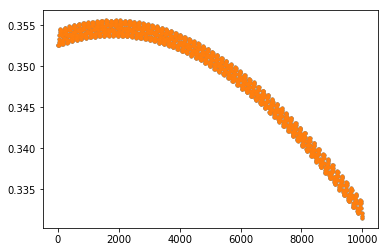

In [121]:
fig, ax = plt.subplots()
ax.plot(times, e, '.')
ax.plot(times, e2, '.')

In [122]:
sim2.calculate_megno()

2.0311338306510827

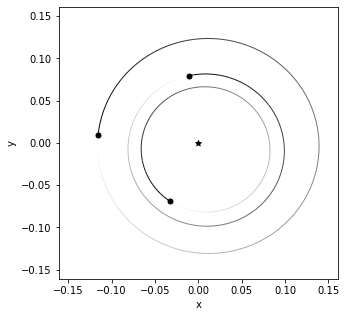

In [25]:
fig = rebound.OrbitPlot(sim)

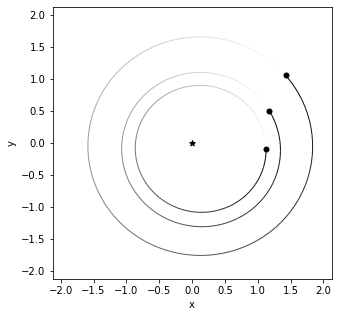

In [26]:
fig = rebound.OrbitPlot(sim2)

In [27]:
sim.t

315.15044863943706

In [78]:
sim.dt/sim.particles[1].P

0.034643632014705474

In [79]:
2*np.sqrt(3)

3.4641016151377544

In [97]:
rebound.__githash__

'06c95e2a69d319de3b077d92f2541cdcdf68a8fa'

In [37]:
import pandas as pd
csvpath = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/MLstability/training_data/TTVsystems/KOI-0115/'
ndf = pd.read_csv(csvpath+'normressummaryfeaturesxgbNorbits10000.0Nout1000/trainingdata.csv', index_col=0)
ndf.head()

,C_AMD12,C_AMD23,C_AMD_max,Zcross12,Zcross13,Zcross23,maxj,maxk,maxi1,maxi2,...,Zcomdrift23,Zcomrollingstd23,phiZcomdrift23,phiZcomrollingstd23,Zstardrift23,Zstarrollingstd23,Zcosphistd23,medZcosphi23,tlyap,megno
0,0.105693,0.089463,0.105693,0.353616,0.626178,0.201358,2.0,1.0,1.0,3.0,...,0.416322,0.012854,0.308443,0.006879,0.035162,0.001541,0.037059,0.006649,-1.461971e+06,2.001100
1,1.504949,2.526332,2.526332,0.353652,0.626298,0.201415,4.0,1.0,2.0,3.0,...,0.013470,0.000439,0.294417,0.008627,0.069656,0.006495,0.033436,0.008836,-5.361323e+06,2.001282
2,0.681258,1.173940,1.173940,0.353742,0.626262,0.201308,4.0,1.0,2.0,3.0,...,0.077314,0.002408,0.098897,0.003162,0.066280,0.004294,0.034876,0.004585,-1.396584e+07,2.000833
3,0.080784,0.161035,0.161035,0.353476,0.626173,0.201478,4.0,1.0,2.0,3.0,...,0.149047,0.005759,0.578757,0.016756,0.018381,0.003252,0.024947,0.012221,1.207974e+06,1.999479
4,0.132273,0.277817,0.277817,0.353581,0.626106,0.201336,2.0,1.0,1.0,3.0,...,0.232082,0.005341,0.419972,0.013094,0.036427,0.003360,0.032332,0.007355,6.365815e+05,2.000559


In [38]:
df = pd.read_csv(csvpath+'ressummaryfeaturesxgbNorbits10000.0Nout1000/trainingdata.csv', index_col=0)
df.head()

,C_AMD12,C_AMD23,C_AMD_max,Zcross12,Zcross13,Zcross23,maxj,maxk,maxi1,maxi2,...,Zcomdrift23,Zcomrollingstd23,phiZcomdrift23,phiZcomrollingstd23,Zstardrift23,Zstarrollingstd23,Zcosphistd23,medZcosphi23,tlyap,megno
0,0.105693,0.089463,0.105693,0.353616,0.626178,0.201358,2.0,1.0,1.0,3.0,...,0.416322,0.012854,0.308443,0.006879,0.035162,0.001541,0.037059,0.006649,14300.843513,1.997693
1,1.504949,2.526332,2.526332,0.353652,0.626298,0.201415,4.0,1.0,2.0,3.0,...,0.013470,0.000439,0.294417,0.008627,0.069656,0.006495,0.033436,0.008836,138893.808379,2.001565
2,0.681258,1.173940,1.173940,0.353742,0.626262,0.201308,4.0,1.0,2.0,3.0,...,0.077314,0.002408,0.098897,0.003162,0.066280,0.004294,0.034876,0.004585,-82501.353014,2.000099
3,0.080784,0.161035,0.161035,0.353476,0.626173,0.201478,4.0,1.0,2.0,3.0,...,0.149047,0.005759,0.578757,0.016756,0.018381,0.003252,0.024947,0.012221,-69369.050431,2.001645
4,0.132273,0.277817,0.277817,0.353581,0.626106,0.201336,2.0,1.0,1.0,3.0,...,0.232082,0.005341,0.419972,0.013094,0.036427,0.003360,0.032332,0.007355,-176943.931484,2.001102


In [41]:
ndf['megno'].median()

2.0007552683030227

In [20]:
df.columns

Index(['C_AMD12', 'C_AMD23', 'C_AMD_max', 'Zcross12', 'Zcross13', 'Zcross23',
       'maxj', 'maxk', 'maxi1', 'maxi2', 'maxstrength', 'secondres', 'EMmed12',
       'EMmax12', 'EMdrift12', 'capseculartscale12', 'EMdetrendedstd12',
       'EMrollingstd12', 'DiffcoeffEM12', 'medvarEM12', 'Zmed12', 'Zmax12',
       'Zdetrendedstd12', 'Zrollingstd12', 'DiffcoeffZ12', 'medvarZ12',
       'Zcomdrift12', 'Zcomrollingstd12', 'phiZcomdrift12',
       'phiZcomrollingstd12', 'Zstardrift12', 'Zstarrollingstd12',
       'Zcosphistd12', 'medZcosphi12', 'EMmed23', 'EMmax23', 'EMdrift23',
       'capseculartscale23', 'EMdetrendedstd23', 'EMrollingstd23',
       'DiffcoeffEM23', 'medvarEM23', 'Zmed23', 'Zmax23', 'Zdetrendedstd23',
       'Zrollingstd23', 'DiffcoeffZ23', 'medvarZ23', 'Zcomdrift23',
       'Zcomrollingstd23', 'phiZcomdrift23', 'phiZcomrollingstd23',
       'Zstardrift23', 'Zstarrollingstd23', 'Zcosphistd23', 'medZcosphi23',
       'tlyap', 'megno'],
      dtype='object')

In [32]:
col = 'EMmed12'
df[col]-ndf[col]

0      -0.006750
1       0.004418
2       0.000150
3      -0.003865
4       0.000524
5      -0.002084
6       0.009901
7       0.003735
8      -0.000352
9       0.001852
10     -0.001437
11      0.001389
12     -0.006346
13     -0.000362
14      0.006926
15     -0.001610
16      0.000072
17     -0.003742
18      0.007655
19      0.002914
20     -0.007914
21     -0.008472
22     -0.000919
23      0.003654
24     -0.004465
25     -0.003561
26     -0.000706
27      0.000117
28      0.002834
29      0.002028
          ...   
1470   -0.003920
1471    0.000507
1472    0.005856
1473    0.003314
1474    0.000826
1475    0.008644
1476   -0.005591
1477    0.002020
1478    0.006137
1479    0.004733
1480   -0.000278
1481   -0.003911
1482   -0.001759
1483    0.001770
1484    0.002782
1485   -0.000262
1486   -0.005893
1487    0.002038
1488    0.006089
1489    0.008503
1490   -0.004665
1491    0.003817
1492    0.001073
1493    0.005696
1494    0.000818
1495   -0.006307
1496   -0.003688
1497    0.0011